In [1]:
# price an option using the Black-Scholes-Merton model
# import modules
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# data import
import yfinance as yf

# open expiry dates

start_date = "2017-01-01"

end_date = "2022-01-01"

options_open_data = yf.download("SPY AAPL", start=start_date, end=end_date)

options_open_data = pd.DataFrame(options_open_data)

options_open_data.head()




[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2017-01-03  27.133329  202.856552  29.037500  225.240005  29.082500   
2017-01-04  27.102961  204.063339  29.004999  226.580002  29.127501   
2017-01-05  27.240786  203.901245  29.152500  226.399994  29.215000   
2017-01-06  27.544476  204.630768  29.477501  227.210007  29.540001   
2017-01-09  27.796762  203.955322  29.747499  226.460007  29.857500   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2017-01-03  225.830002  28.690001  223.880005  28.950001  225.039993   
2017-01-04  226.750000  28.937500  225.610001  28.962500  225.619995   
2017-01-05  226.580002  28.952499  225.479996  28.980000  226.270004   
2017-01-06  227.750000  29.117500  225.899994  29.195000  226.529999   
2017-01-09  227.070007  29.485001  226.419998  29.487499  226.910004   

               Volume            
                 AAPL       SPY  
Date                             
2017-01-03  115127600  91366500  
2017-01-04   84472400  78744400  
2017-01-05   88774400  78379000  
2017-01-06  127007600  71559900  
2017-01-09  134247600  46939700

In [3]:
import yfinance as yf

tickers = ['AAPL', 'GOOG', 'TSLA']  # List of tickers

for ticker in tickers:
    msft = yf.Ticker(ticker)
    expirations = msft.options  # Get the list of option expirations for the given ticker
    print(f"Option expirations for {ticker}: {expirations}")


Option expirations for AAPL: ('2023-03-03', '2023-03-10', '2023-03-17', '2023-03-24', '2023-03-31', '2023-04-06', '2023-04-21', '2023-05-19', '2023-06-16', '2023-07-21', '2023-08-18', '2023-09-15', '2023-10-20', '2023-12-15', '2024-01-19', '2024-03-15', '2024-06-21', '2024-09-20', '2025-01-17', '2025-06-20', '2025-12-19')
Option expirations for GOOG: ('2023-03-03', '2023-03-10', '2023-03-17', '2023-03-24', '2023-03-31', '2023-04-06', '2023-04-21', '2023-05-19', '2023-06-16', '2023-07-21', '2023-09-15', '2024-01-19', '2024-06-21', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-12-19')
Option expirations for TSLA: ('2023-03-03', '2023-03-10', '2023-03-17', '2023-03-24', '2023-03-31', '2023-04-06', '2023-04-21', '2023-05-19', '2023-06-16', '2023-07-21', '2023-09-15', '2023-11-17', '2023-12-15', '2024-01-19', '2024-03-15', '2024-06-21', '2024-09-20', '2025-01-17', '2025-06-20')


In [4]:
import yfinance as yf

ticker = "AAPL" # Stock ticker
msft = yf.Ticker(ticker) # Create Ticker object

# Get call option chain for the given expiration date
expiration_date = "2023-03-17"
options = msft.option_chain(expiration_date).calls

# Extract strike price, expiration date, and implied volatility for each call option
for index, option in options.iterrows():
    strike = option["strike"]
    expiration = option["expiration"]
    implied_volatility = option["impliedVolatility"]
    print(f"Option {index}: Strike price: {strike}, Expiration: {expiration}, Implied volatility: {implied_volatility}")


KeyError: 'expiration'

In [ ]:
import yfinance as yf

ticker = "AAPL" # Stock ticker
msft = yf.Ticker(ticker) # Create Ticker object

# Get call option chain for the given expiration date
expiration_date = "2023-03-17"
options = msft.option_chain(expiration_date).calls

if "expiration" not in options.columns:
    print(f"ERROR: no 'expiration' column found in option chain for {ticker} and expiration date {expiration_date}.")
else:
    # Extract strike price, expiration date, and implied volatility for each call option
    for index, option in options.iterrows():
        strike = option["strike"]
        expiration = option["expiration"]
        implied_volatility = option["impliedVolatility"]
        print(f"Option {index}: Strike price: {strike}, Expiration: {expiration}, Implied volatility: {implied_volatility}")


ERROR: no 'expiration' column found in option chain for AAPL and expiration date 2023-03-17.


In [ ]:
import yfinance as yf
import pandas as pd

ticker = "AAPL" # Stock ticker
msft = yf.Ticker(ticker) # Create Ticker object

# Get option chain data for all expiration dates for both calls and puts
calls = msft.option_chain().calls
puts = msft.option_chain().puts

# Convert call and put option chain data to DataFrames
calls_df = pd.DataFrame(calls)
puts_df = pd.DataFrame(puts)

# Add a column to the call and put DataFrames to indicate call or put option
calls_df["Option Type"] = "Call"
puts_df["Option Type"] = "Put"

# Combine call and put DataFrames into a single DataFrame
df = pd.concat([calls_df, puts_df], axis=0)

df.head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Option Type
0,AAPL230224C00050000,2023-02-22 19:50:26+00:00,50.0,98.95,98.05,98.25,0.000000,0.000000,7.0,9,0.00001,True,REGULAR,USD,Call
1,AAPL230224C00055000,2023-02-22 19:02:16+00:00,55.0,93.70,93.05,93.20,0.000000,0.000000,1.0,2,0.00001,True,REGULAR,USD,Call
2,AAPL230224C00060000,2023-02-23 16:06:43+00:00,60.0,87.95,88.10,88.30,-1.200005,-1.346051,2.0,3,0.00001,True,REGULAR,USD,Call
3,AAPL230224C00065000,2023-02-14 19:05:09+00:00,65.0,87.85,83.05,83.30,0.000000,0.000000,2.0,2,0.00001,True,REGULAR,USD,Call
4,AAPL230224C00080000,2023-01-25 16:07:55+00:00,80.0,59.42,67.95,68.35,0.000000,0.000000,1.0,3,0.00001,True,REGULAR,USD,Call


In [ ]:
import yfinance as yf
import pandas as pd

def get_options_data(tickers):
    calls_list = []
    puts_list = []

    for ticker in tickers:
        msft = yf.Ticker(ticker) # Create Ticker object

        # Get option chain data for all expiration dates for both calls and puts
        calls = msft.option_chain().calls
        puts = msft.option_chain().puts

        # Convert call and put option chain data to DataFrames
        calls_df = pd.DataFrame(calls)
        puts_df = pd.DataFrame(puts)

        # Add a column to the call and put DataFrames to indicate call or put option
        calls_df["Option Type"] = "Call"
        puts_df["Option Type"] = "Put"

        # Add a column to the call and put DataFrames to indicate the ticker
        calls_df["Ticker"] = ticker
        puts_df["Ticker"] = ticker

        # Append the call and put DataFrames to their respective lists
        calls_list.append(calls_df)
        puts_list.append(puts_df)

    # Combine call and put DataFrames from all tickers into a single DataFrame
    calls_df = pd.concat(calls_list, axis=0)
    puts_df = pd.concat(puts_list, axis=0)
    df = pd.concat([calls_df, puts_df], axis=0)

    return df

tickers = ["AAPL", "GOOG", "TSLA"]
df = get_options_data(tickers)
df.head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Option Type,Ticker
0,AAPL230224C00050000,2023-02-22 19:50:26+00:00,50.0,98.95,99.05,99.20,0.000000,0.000000,7.0,9,0.00001,True,REGULAR,USD,Call,AAPL
1,AAPL230224C00055000,2023-02-22 19:02:16+00:00,55.0,93.70,94.05,94.20,0.000000,0.000000,1.0,2,0.00001,True,REGULAR,USD,Call,AAPL
2,AAPL230224C00060000,2023-02-23 16:06:43+00:00,60.0,87.95,89.05,89.15,-1.200005,-1.346051,2.0,3,0.00001,True,REGULAR,USD,Call,AAPL
3,AAPL230224C00065000,2023-02-14 19:05:09+00:00,65.0,87.85,84.00,84.30,0.000000,0.000000,2.0,2,0.00001,True,REGULAR,USD,Call,AAPL
4,AAPL230224C00080000,2023-01-25 16:07:55+00:00,80.0,59.42,68.95,69.25,0.000000,0.000000,1.0,3,0.00001,True,REGULAR,USD,Call,AAPL


In [ ]:
import yfinance as yf
import pandas as pd
import concurrent.futures

def fetch_ticker_options(ticker):
    msft = yf.Ticker(ticker) # Create Ticker object

    # Get option chain data for all expiration dates for both calls and puts
    calls = msft.option_chain().calls
    puts = msft.option_chain().puts

    # Convert call and put option chain data to DataFrames
    calls_df = pd.DataFrame(calls)
    puts_df = pd.DataFrame(puts)

    # Add a column to the call and put DataFrames to indicate call or put option
    calls_df["Option Type"] = "Call"
    puts_df["Option Type"] = "Put"

    # Add a column to the call and put DataFrames to indicate the ticker
    calls_df["Ticker"] = ticker
    puts_df["Ticker"] = ticker

    return calls_df, puts_df

def get_options_data(tickers):
    calls_list = []
    puts_list = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = [executor.submit(fetch_ticker_options, ticker) for ticker in tickers]
        for future in concurrent.futures.as_completed(results):
            calls_df, puts_df = future.result()
            calls_list.append(calls_df)
            puts_list.append(puts_df)

    # Combine call and put DataFrames from all tickers into a single DataFrame
    calls_df = pd.concat(calls_list, axis=0)
    puts_df = pd.concat(puts_list, axis=0)
    df = pd.concat([calls_df, puts_df], axis=0)

    return df


tickers = ["AAPL", "GOOG", "TSLA"]
df = get_options_data(tickers)
df.head()





,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Option Type,Ticker
0,GOOG230224C00050000,2023-02-22 20:54:40+00:00,50.0,41.85,41.20,41.3,0.000000,0.000000,1.0,7,3.570314,True,REGULAR,USD,Call,GOOG
1,GOOG230224C00065000,2023-02-17 17:19:02+00:00,65.0,28.94,26.15,26.6,0.000000,0.000000,2.0,1,2.515629,True,REGULAR,USD,Call,GOOG
2,GOOG230224C00070000,2023-02-23 17:24:11+00:00,70.0,20.19,21.20,21.5,-1.979999,-8.930985,4.0,45,1.988281,True,REGULAR,USD,Call,GOOG
3,GOOG230224C00075000,2023-02-14 16:20:33+00:00,75.0,18.65,15.90,16.8,0.000000,0.000000,NaN,1,1.546877,True,REGULAR,USD,Call,GOOG
4,GOOG230224C00076000,2023-02-08 17:56:26+00:00,76.0,24.00,14.85,15.8,0.000000,0.000000,NaN,1,1.414065,True,REGULAR,USD,Call,GOOG


In [ ]:
import yfinance as yf
import pandas as pd
from mibian import BS

def fetch_ticker_options(ticker):
    msft = yf.Ticker(ticker) # Create Ticker object

    # Get option chain data for all expiration dates for both calls and puts
    calls = msft.option_chain().calls
    puts = msft.option_chain().puts

    # Convert call and put option chain data to DataFrames
    calls_df = pd.DataFrame(calls)
    puts_df = pd.DataFrame(puts)

    # Add a column to the call and put DataFrames to indicate call or put option
    calls_df["Option Type"] = "Call"
    puts_df["Option Type"] = "Put"

    # Add a column to the call and put DataFrames to indicate the ticker
    calls_df["Ticker"] = ticker
    puts_df["Ticker"] = ticker

    # Calculate greeks for call options
    for index, option in calls_df.iterrows():
        strike = option["strike"]
        implied_volatility = option["impliedVolatility"]
        underlying_price = option["lastPrice"]
        interest_rate = 0.01

        try:
            expiration = option["expiration"]
        except KeyError:
            continue

        call_option = BS([underlying_price, strike, interest_rate, 0, expiration], volatility=implied_volatility)
        calls_df.at[index, "Delta"] = call_option.delta
        calls_df.at[index, "Gamma"] = call_option.gamma
        calls_df.at[index, "Vega"] = call_option.vega
        calls_df.at[index, "Theta"] = call_option.theta
        calls_df.at[index, "Rho"] = call_option.rho

    # Calculate greeks for put options
    for index, option in puts_df.iterrows():
        strike = option["strike"]
        implied_volatility = option["impliedVolatility"]
        underlying_price = option["lastPrice"]
        interest_rate = 0.01

        try:
            expiration = option["expiration"]
        except KeyError:
            continue

        put_option = BS([underlying_price, strike, interest_rate, 0, expiration], volatility=implied_volatility)
        puts_df.at[index, "Delta"] = put_option.delta
        puts_df.at[index, "Gamma"] = put_option.gamma
        puts_df.at[index, "Vega"] = put_option.vega
        puts_df.at[index, "Theta"] = put_option.theta
        puts_df.at[index, "Rho"] = put_option.rho

    return calls_df, puts_df


def get_options_data(tickers):
    calls_list = []
    puts_list = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = [executor.submit(fetch_ticker_options, ticker) for ticker in tickers]
        for future in concurrent.futures.as_completed(results):
            calls_df, puts_df = future.result()
            calls_list.append(calls_df)
            puts_list.append(puts_df)

    # Combine call and put DataFrames from all tickers into a single DataFrame
    calls_df = pd.concat(calls_list, axis=0)
    puts_df = pd.concat(puts_list, axis=0)
    df = pd.concat([calls_df, puts_df], axis=0)

    return df


tickers = ["AAPL", "GOOG", "TSLA"]
df = get_options_data(tickers)
df.head()



,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Option Type,Ticker
0,GOOG230224C00050000,2023-02-22 20:54:40+00:00,50.0,41.85,41.05,41.15,0.000000,0.000000,1.0,7,0.000010,True,REGULAR,USD,Call,GOOG
1,GOOG230224C00065000,2023-02-17 17:19:02+00:00,65.0,28.94,26.05,26.20,0.000000,0.000000,2.0,1,1.875001,True,REGULAR,USD,Call,GOOG
2,GOOG230224C00070000,2023-02-23 17:24:11+00:00,70.0,20.19,20.90,21.65,-1.979999,-8.930985,4.0,45,1.816407,True,REGULAR,USD,Call,GOOG
3,GOOG230224C00075000,2023-02-14 16:20:33+00:00,75.0,18.65,16.05,16.20,0.000000,0.000000,NaN,1,1.140629,True,REGULAR,USD,Call,GOOG
4,GOOG230224C00076000,2023-02-08 17:56:26+00:00,76.0,24.00,14.80,15.70,0.000000,0.000000,NaN,1,1.257816,True,REGULAR,USD,Call,GOOG


In [ ]:
calls, puts = fetch_ticker_options("AAPL")
calls.head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Option Type,Ticker
0,AAPL230224C00050000,2023-02-22 19:50:26+00:00,50.0,98.95,99.05,99.20,0.000000,0.000000,7.0,9,0.00001,True,REGULAR,USD,Call,AAPL
1,AAPL230224C00055000,2023-02-22 19:02:16+00:00,55.0,93.70,94.15,94.30,0.000000,0.000000,1.0,2,0.00001,True,REGULAR,USD,Call,AAPL
2,AAPL230224C00060000,2023-02-23 16:06:43+00:00,60.0,87.95,88.95,89.25,-1.200005,-1.346051,2.0,3,0.00001,True,REGULAR,USD,Call,AAPL
3,AAPL230224C00065000,2023-02-14 19:05:09+00:00,65.0,87.85,84.10,84.35,0.000000,0.000000,2.0,2,0.00001,True,REGULAR,USD,Call,AAPL
4,AAPL230224C00080000,2023-01-25 16:07:55+00:00,80.0,59.42,69.15,69.35,0.000000,0.000000,1.0,3,0.00001,True,REGULAR,USD,Call,AAPL


In [ ]:
# sample parameters singular option
# parameters
S0 = 100. # initial index level
K = 105. # strike price
T = 1.0 # call option maturity
r = 0.05 # riskless short rate
sigma = 0.2 # volatility


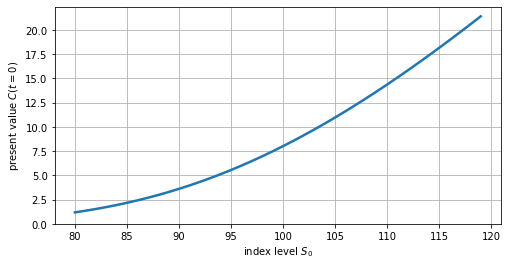

In [ ]:
# function to calculate the Black-Scholes-Merton option value
def bsm_call_value(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    sigma : float
        volatility factor in diffusion term
    
    Returns
    =======
    value : float
        present value of the European call option
    '''
    S0 = float(S0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    value = (S0 * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    # stats.norm.cdf --> cumulative distribution function
    # for normal distribution
    return value

# calculate call option value
bsm_call_value(S0, K, T, r, sigma)

# vectorize the bsm_call_value function
bsm_call_vector = np.vectorize(bsm_call_value)

# plot the value of a European call option
# with respect to the index level S0
plt.figure(figsize=(8, 4))
S0 = np.arange(80, 120, 1)
h = plt.plot(S0, bsm_call_vector(S0, K, T, r, sigma), lw=2.5)
plt.grid(True)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$')
plt.ylim(ymin=0)
plt.show()



In [ ]:
# calculate the Black-Scholes-Merton delta
def bsm_call_delta(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    sigma : float
        volatility factor in diffusion term
    
    Returns
    =======
    delta : float
        delta of European call option
    '''
    S0 = float(S0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta = si.norm.cdf(d1, 0.0, 1.0)
    return delta



In [ ]:
# calculate the Black-Scholes-Merton gamma
def bsm_call_gamma(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    sigma : float
        volatility factor in diffusion term
    
    Returns
    =======
    gamma : float
        gamma of European call option
    '''
    S0 = float(S0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = si.norm.pdf(d1, 0.0, 1.0) / (S0 * sigma * np.sqrt(T))
    return gamma

In [ ]:
# calculate the Black-Scholes-Merton vega
def bsm_vega(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    sigma : float
        volatility factor in diffusion term
    
    Returns
    =======
    vega : float
        vega of European call option
    '''
    S0 = float(S0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    vega = S0 * si.norm.pdf(d1, 0.0, 1.0) * np.sqrt(T)
    return vega

In [ ]:
# calculate the Black-Scholes-Merton theta

def bsm_call_theta(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    sigma : float
        volatility factor in diffusion term
    
    Returns
    =======
    theta : float
        theta of European call option
    '''
    S0 = float(S0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    theta = - (S0 * si.norm.pdf(d1, 0.0, 1.0) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return theta


In [ ]:
# calculate the second order greeks (vanna, charm, vomma, veta, speed, zomma, color, ultima) in one function
def bsm_greeks(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    sigma : float
        volatility factor in diffusion term
    
    Returns
    =======
    vanna : float
        vanna of European call option
    charm : float
        charm of European call option
    vomma : float
        vomma of European call option
    veta : float
        veta of European call option
    speed : float
        speed of European call option
    zomma : float
        zomma of European call option
    color : float
        color of European call option
    ultima : float
        ultima of European call option
    '''
    S0 = float(S0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    vanna = - si.norm.pdf(d1, 0.0, 1.0) * d2 / sigma
    charm = - si.norm.pdf(d1, 0.0, 1.0) * (2 * r * T - d2 * sigma * np.sqrt(T)) / (2 * T)
    vomma = S0 * si.norm.pdf(d1, 0.0, 1.0) * np.sqrt(T) * d1 / sigma
    veta = S0 * si.norm.pdf(d1, 0.0, 1.0) * d1 * np.sqrt(T) / 2
    speed = si.norm.pdf(d1, 0.0, 1.0) / (S0 * sigma * np.sqrt(T))
    zomma = - si.norm.pdf(d1, 0.0, 1.0) * d1 / (S0 * sigma ** 2 * np.sqrt(T))
    color = - si.norm.pdf(d1, 0.0, 1.0) * (d1 * d2 - 1) / (sigma ** 2 * np.sqrt(T))

In [ ]:
# calculate the third order greeks (ultima, speed, zomma, color) in one function
# convert to a pandas dataframe for better visualization


def bsm_greeks(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    sigma : float
        volatility factor in diffusion term
    
    Returns
    =======
    vanna : float
        vanna of European call option
    charm : float
        charm of European call option
    vomma : float
        vomma of European call option
    veta : float
        veta of European call option
    speed : float
        speed of European call option
    zomma : float
        zomma of European call option
    color : float
        color of European call option
    ultima : float
        ultima of European call option
    '''
    S0 = float(S0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    vanna = - si.norm.pdf(d1, 0.0, 1.0) * d2 / sigma
    charm = - si.norm.pdf(d1, 0.0, 1.0) * (2 * r * T - d2 * sigma * np.sqrt(T)) / (2 * T)
    vomma = S0 * si.norm.pdf(d1, 0.0, 1.0) * np.sqrt(T) * d1 / sigma
    veta = S0 * si.norm.pdf(d1, 0.0, 1.0) * d1 * np.sqrt(T) / 2
    speed = si.norm.pdf(d1, 0.0, 1.0) / (S0 * sigma * np.sqrt(T))
    zomma = - si.norm.pdf(d1, 0.0, 1.0) * d1 / (S0 * sigma ** 2 * np.sqrt(T))
    color = - si.norm.pdf(d1, 0.0, 1.0) * (d1 * d2 - 1) / (sigma ** 2 * np.sqrt(T))

    # show the results in a pandas dataframe
    greeks = pd.DataFrame([vanna, charm, vomma, veta, speed, zomma, color], index=['vanna', 'charm', 'vomma', 'veta', 'speed', 'zomma', 'color'], columns=['greeks'])
    return greeks





NameError: name 'greeks' is not defined

In [ ]:
# calculate the implied volatility
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    ''' Iteration based estimation of implied volatility.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    sigma_est : float
        estimate of impl. volatility
    it : integer
        number of iterations
    
    Returns
    =======
    simga_est : float
        numerically estimated implied volatility
    '''
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) /
                      bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est


In [ ]:
C0 = bsm_call_value(100., 105., 1., 0.05, 0.2) # 4.7549
imp_vol = bsm_call_imp_vol(100., 105., 1., 0.05, C0, sigma_est=0.2, it=100) # 0.2016
print(imp_vol)

0.2


0.2


C:\Users\honan\AppData\Local\Temp\ipykernel_13712\3389917507.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) /
C:\Users\honan\AppData\Local\Temp\ipykernel_13712\3714297425.py:25: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\honan\AppData\Local\Temp\ipykernel_13712\3714297425.py:26: RuntimeWarning: invalid value encountered in double_scalars
  d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\honan\AppData\Local\Temp\ipykernel_13712\3714297425.py:25: RuntimeWarning: overflow encountered in double_scalars
  d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\honan\AppData\Local\Temp\ipykernel_13712\3714297425.py:26: RuntimeWarning: overflow encountered in double_scalars
  d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


ValueError: x and y must have same first dimension, but have shapes (1,) and (24,)

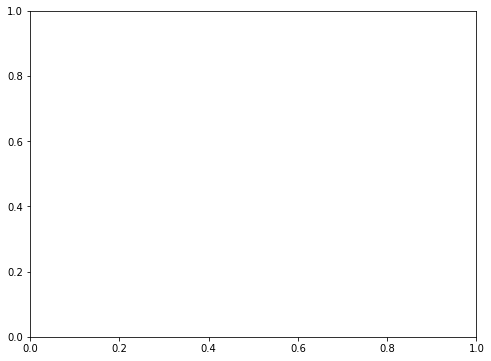

In [ ]:
 # plot the implied volatility smile
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    ''' Iteration based estimation of implied volatility.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    sigma_est : float
        estimate of impl. volatility
    it : integer
        number of iterations
    
    Returns
    =======
    simga_est : float
        numerically estimated implied volatility
    '''
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) /
                      bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est


C0 = bsm_call_value(100., 105., 1., 0.05, 0.2) # 4.7549
imp_vol = bsm_call_imp_vol(100., 105., 1., 0.05, C0, sigma_est=0.2, it=100) # 0.2016
print(imp_vol)

# plot the implied volatility smile
def plot_imp_vol(S0, K, T, r):
    ''' Plot implied volatility smile.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : array
        different strike prices
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    '''
    imp_vols = []
    for K in K:
        imp_vol = bsm_call_imp_vol(S0, K, T, r, C0, sigma_est=2., it=100)
        imp_vols.append(imp_vol)
    plt.figure(figsize=(8, 6))
    plt.plot(K, imp_vols, 'b', lw=2.5)
    plt.grid(True)
    plt.xlabel('strike')
    plt.ylabel('implied volatility of volatility')
    plt.show()

plot_imp_vol(100., np.linspace(80, 120, 24), T=1., r=0.05)








